In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#! pip3 install plotly.express
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from datetime import datetime
import scipy
import scipy.stats as stats
%matplotlib inline

In [2]:
names = ["MP","Rajasthan1","Tamil Nadu","Andhra Pradesh"]
data = {}       #Iniatilizing empty list
for nm in names:
    data[nm] = []

def keys(x):
  return x[-8:]    
for nm in names:
    for file in sorted(os.listdir(nm), key=keys):
        temp = pd.read_csv(nm+'/'+file, skiprows=2, 
                     parse_dates={'date_time': ['Year','Month','Day','Hour']}, 
                     date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H'))
        temp = temp[(temp['date_time'].dt.hour >=8) & (temp['date_time'].dt.hour <=16)]
        # Taking only 4 evenly spaced data points, uncomment above line and comment line below to take all data into account
        #data_temp = data_temp[data_temp['date_time'].dt.hour.isin([9,11,13,15])]

        data[nm].extend(temp.values) 
        col = ['date_time','Minutes','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Snow depth','Wind Speed','NAN']



In [3]:
MP=pd.DataFrame(data['MP'],columns=col)
MP=MP[MP['GHI'].notna()]
del MP['Minutes']
del MP['NAN']
MP.name='MADHYA PRADESH'
MP.head()


date_time  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0 2000-01-01 08:00:00  149  375  268           121           465   
1 2000-01-01 09:00:00  162  611  455           160           617   
2 2000-01-01 10:00:00  183  698  600           183           698   
3 2000-01-01 11:00:00  194  735  682           194           735   
4 2000-01-01 12:00:00  195  740  695           195           740   

   Clearsky GHI  Dew Point  Temperature    Pressure  Relative Humidity  \
0           268          9    16.043264  969.206482          65.736004   
1           456          9    20.477919  969.256287          48.926508   
2           600          9    23.532446  969.059021          41.357676   
3           682          9    25.100303  968.150452          37.809076   
4           695          9    25.644234  967.158325          36.318170   

   Solar Zenith Angle  Snow depth  Wind Speed  
0           71.561409           0    1.404870  
1           61.406733           0    1.177964  
2           53.319769           0    0.574517  
3           48.357745           0    0.293565  
4           47.514574           0    0.457926

In [4]:
Rajasthan1=pd.DataFrame(data['Rajasthan1'],columns=col)
Rajasthan1=Rajasthan1[Rajasthan1['GHI'].notna()]
del Rajasthan1['Minutes']
del Rajasthan1['NAN']
Rajasthan1.name='RAJASTHAN'
Rajasthan1.head()

date_time  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0 2000-01-01 08:00:00   78  306  135            74           354   
1 2000-01-01 09:00:00  114  597  331           121           600   
2 2000-01-01 10:00:00  144  681  488           147           721   
3 2000-01-01 11:00:00  151  759  608           162           782   
4 2000-01-01 12:00:00  156  788  664           168           805   

   Clearsky GHI  Dew Point  Temperature    Pressure  Relative Humidity  \
0           139         -8    14.277325  986.486450          20.120814   
1           339         -6    17.677278  986.856323          18.365240   
2           512         -4    21.872848  986.979065          16.310936   
3           633         -2    26.036963  986.390442          14.891855   
4           687         -2    28.260238  985.398315          13.308055   

   Solar Zenith Angle  Snow depth  Wind Speed  
0           79.450627           0    3.323988  
1           68.755938           0    2.818877  
2           59.670536           0    2.604525  
3           53.040145           0    2.763721  
4           49.861770           0    2.677435

In [5]:
T_N=pd.DataFrame(data['Tamil Nadu'],columns=col)
T_N=T_N[T_N['GHI'].notna()]
del T_N['Minutes']
del T_N['NAN']
T_N.name='TAMIL NADU'
T_N.head()

date_time  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0 2000-01-01 08:00:00  147  468  341           117           611   
1 2000-01-01 09:00:00  184  587  535           143           737   
2 2000-01-01 10:00:00  228  630  692           159           804   
3 2000-01-01 11:00:00  177  821  851           167           837   
4 2000-01-01 12:00:00  171  816  860           169           845   

   Clearsky GHI  Dew Point  Temperature    Pressure  Relative Humidity  \
0           370         17    22.268241  953.526489          73.018861   
1           584         17    23.986125  953.256287          66.480553   
2           751         17    25.217761  952.739014          61.667143   
3           854         17    25.983396  951.830444          59.480310   
4           882         17    26.406886  950.518311          58.353354   

   Solar Zenith Angle  Snow depth  Wind Speed  
0           65.523141           0    0.716501  
1           53.289244           0    0.776021  
2           42.592118           0    0.819869  
3           34.901158           0    0.824011  
4           32.445055           0    0.811820

In [6]:
cols= ['date_time','Minutes','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Wind Speed','NAN']
A_P=pd.DataFrame(data['Andhra Pradesh'],columns=cols)
A_P=A_P[A_P['GHI'].notna()]
del A_P['Minutes']
del A_P['NAN']
A_P.name='ANDHRA PRADESH'
A_P.head()

date_time  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0 2000-01-01 08:00:00  110  602  333           110           602   
1 2000-01-01 09:00:00  138  740  547           138           740   
2 2000-01-01 10:00:00  155  812  714           155           812   
3 2000-01-01 11:00:00  164  847  818           164           847   
4 2000-01-01 12:00:00  261  674  797           167           855   

   Clearsky GHI  Dew Point  Temperature    Pressure  Relative Humidity  \
0           333         14    18.137191  942.006470          80.201618   
1           547         14    21.422234  941.736328          66.567218   
2           714         14    23.382713  941.219055          58.555843   
3           818         14    24.719346  940.310425          53.863563   
4           847         14    25.476261  938.998352          51.624979   

   Solar Zenith Angle  Wind Speed  
0           68.258226    2.482057  
1           56.554706    2.902531  
2           46.546520    2.866336  
3           39.556979    2.829693  
4           37.330650    2.829407

# HEATMAPS FOR FEATURE CORRELATION 

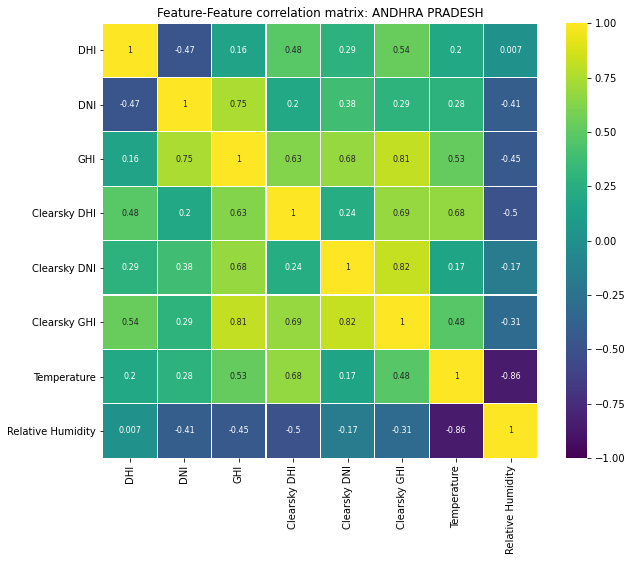

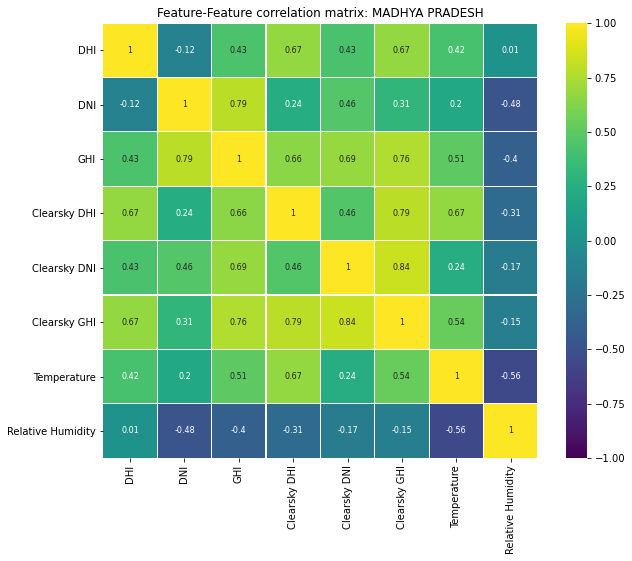

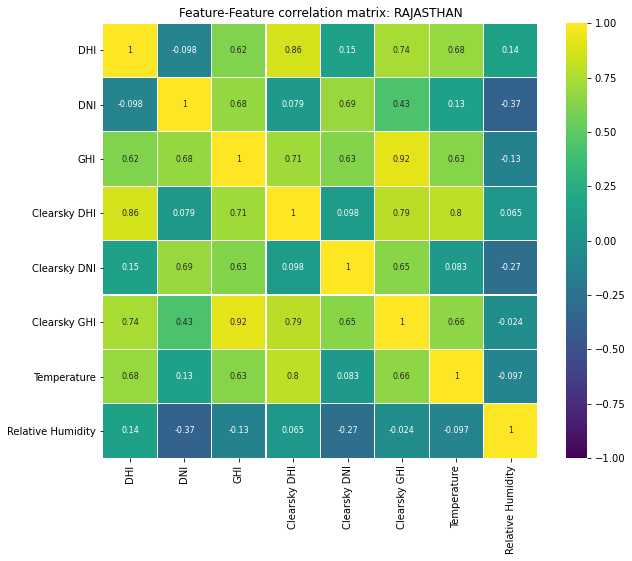

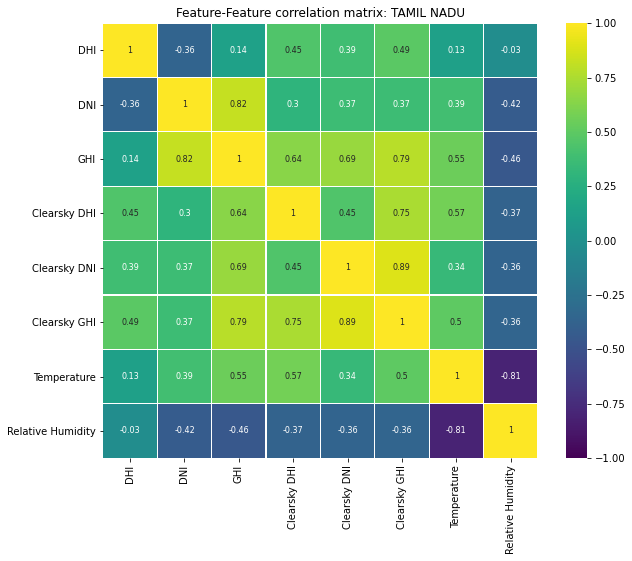

In [7]:
dfs = [A_P , MP, Rajasthan1 , T_N]
for df in dfs:
  df_attributes = df[['DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Temperature','Relative Humidity']]
  corr = df_attributes.corr() # We already examined correlations , drawing a visual plot for the same
  plt.figure(figsize=(10, 8))
  ax = plt.axes()
  ax.set_title('Feature-Feature correlation matrix: ' + str(df.name))
  sns.heatmap(corr, 
              cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
              annot=True, annot_kws={"size": 8}, square=True);
  plt.savefig(str(df.name)+'Heatmaps'+'.png')
  

# CHECK FOR NORMALITY

## Visual Observations

HISTOGRAM

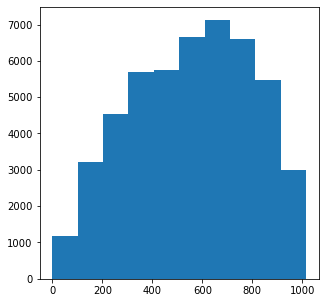

In [8]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(MP['GHI'])
plt.savefig('MPHISTO.png')

Q-Q PLOT

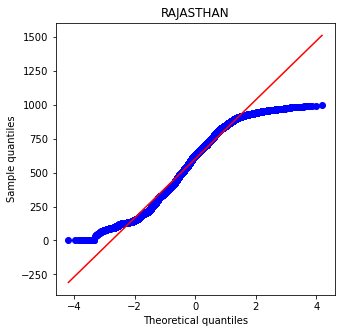

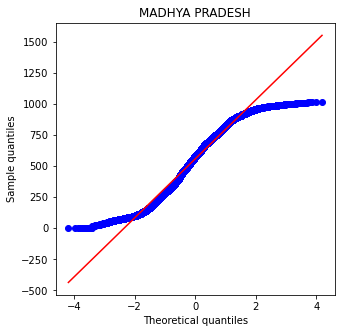

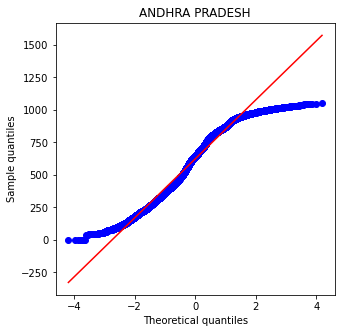

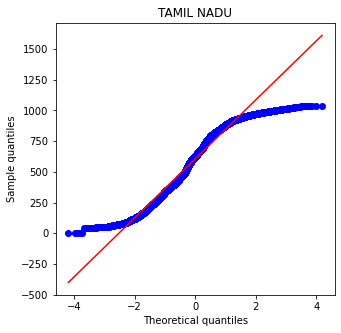

In [9]:
dfs=[Rajasthan1,MP,A_P,T_N]
for df in dfs:
    scipy.stats.probplot(df['GHI'], dist="norm", plot=plt)
    plt.title(df.name)
    plt.ylabel("Sample quantiles")
    plt.show()

#plt.savefig('MPQQPLOT.png',bbox_inches='tight')

# K.S. TEST

In [10]:
dfs=[Rajasthan1,MP,A_P,T_N]
for df in dfs:
    print('TESTING FOR NORMALITY OF',df.name,':' )
    print(stats.kstest(df['GHI'],'norm'))

TESTING FOR NORMALITY OF RAJASTHAN :
KstestResult(statistic=0.9995535261288686, pvalue=0.0)
TESTING FOR NORMALITY OF MADHYA PRADESH :
KstestResult(statistic=0.9996752917300863, pvalue=0.0)
TESTING FOR NORMALITY OF ANDHRA PRADESH :
KstestResult(statistic=0.9998579401319128, pvalue=0.0)
TESTING FOR NORMALITY OF TAMIL NADU :
KstestResult(statistic=0.999898528665652, pvalue=0.0)


In [11]:
MP_N=MP[MP['date_time'].dt.year==2010]

# FINDING DISTRIBUTION OF DATA

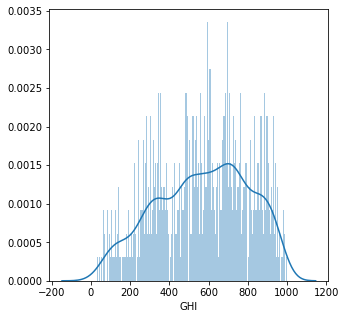

In [12]:
sns.distplot(MP_N['GHI'],bins=1000)
plt.savefig('MPPLOT.png')

In [13]:
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(MP_N['GHI'], percentile_bins)
observed_frequency, bins = (np.histogram(MP_N['GHI'], bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(MP_N['GHI'])
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * len(MP_N['date_time'])
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(0.15383968853216246, -5.525336626103913e-24, 2.81186035663902)

(568.8066971080669, 235.0813572390605)

(0.14969190413513966, 998.0000000000002, 1.6987468028460513)

(1.9954068112941399, 1.4909101984553828, -7.84786985827275, 1006.8893250951899)

(0.2645933962997167, -236.03152460151387, 3042.1346877719934)

(0.0, 998.0)

(321.7886647946425, -3686.6590714848553, 13.2188019844691)

(0.0, 568.8066971080669)

(4.721507892556758, -7.006174329072248e-10, 1.0217191105448222)

(-0.7146974792143754, 568.8066766297145, 241.94809624401506)

(0.7104031985970402, -30.11993816497639, 1064.353228756374)


Distributions listed by Betterment of fit:
............................................
   Distribution    chi_square
3          beta      7.508865
10       triang     38.683876
1          norm     68.847524
6         gamma     70.460111
4      invgauss   1262.447365
5       uniform   1489.771943
7         expon   4475.539206
2   weibull_max  12894.529130
0   weibull_min  34371.365672
8       logn

# STATIONARY CHECK

# VISUALIZATION

In [14]:
fig=px.line(A_P,x=A_P['date_time'].dt.year,y='GHI',title='A_P check')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
    buttons=list([
        dict(count=1,label='1Y',step='year',stepmode='backward'),
        dict(count=2,label='5Y',step='year',stepmode='backward'),
        dict(count=3,label='10Y',step='year',stepmode='backward'),
        dict(step='all')
    
    ])
    )

)
fig.show()
#! pip3 install plotly plotly-orca
#! pip3 install -U kaleido

#! plotly.io.orca.config.executable = '/path/to/orca'
fig.write_image('A_Pstationary.png')

# AUGMENTED DICKY-FULLER TEST

In [15]:
def statess(tdata):
    print ('Test Statistic: ' + str(tdata[0]))
    print ('P value: ' + str(tdata[1]))
    print ('Number of Observations: '+ str(tdata[3]))
    print ('Critical Value 1%: '+ str(tdata[4]['1%']))
    print ('Critical Value 5%: '+ str(tdata[4]['5%']))
    print ('Critical Value 10%: '+ str(tdata[4]['10%']))
dfs = [A_P , MP, Rajasthan1 , T_N]
for df in dfs:
  print("Checking if series stationary for state: " + df.name)
  statess(adfuller(df['GHI']))
  print('\n')


Checking if series stationary for state: ANDHRA PRADESH
Test Statistic: -16.018460794081854
P value: 6.242689338677115e-29
Number of Observations: 49217
Critical Value 1%: -3.4304828736228092
Critical Value 5%: -2.8615987273918306
Critical Value 10%: -2.566801258651965


Checking if series stationary for state: MADHYA PRADESH
Test Statistic: -13.906234592544354
P value: 5.616335964627711e-26
Number of Observations: 49218
Critical Value 1%: -3.4304828709229724
Critical Value 5%: -2.8615987261985856
Critical Value 10%: -2.566801258016836


Checking if series stationary for state: RAJASTHAN
Test Statistic: -8.824298704025471
P value: 1.841299333767995e-14
Number of Observations: 49218
Critical Value 1%: -3.4304828709229724
Critical Value 5%: -2.8615987261985856
Critical Value 10%: -2.566801258016836


Checking if series stationary for state: TAMIL NADU
Test Statistic: -17.989265821866073
P value: 2.7578932473419845e-30
Number of Observations: 49217
Critical Value 1%: -3.4304828736228092
C

# KPSS TEST

In [16]:
from statsmodels.tsa.stattools import kpss
def test_kpss(series):    
    statistic, p, lags, critical_values = kpss(series, 'c')
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p}')
    print(f'num lags: {lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'KPSS Result: The series is {"not " if p < 0.05 else ""}stationary')

dfs = [A_P , MP, Rajasthan1 , T_N]
for df in dfs:
    test_kpss(df['GHI'])

KPSS Statistic: 0.08037541860064314
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Result: The series is stationary
KPSS Statistic: 0.10100135932285395
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Result: The series is stationary
KPSS Statistic: 0.1219687029675062
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Result: The series is stationary
KPSS Statistic: 0.10936170461913289
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Result: The series is stationary


/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning:

p-value is greater than the indicated p-value

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning:

p-value is greater than the indicated p-value

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning:

p-value is greater than the indicated p-value

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: Interpolati

# TIME SERIES DECOMPOSITION

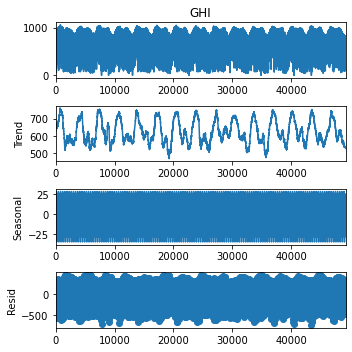

In [17]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(A_P['GHI'],model= 'additive',extrapolate_trend='freq',period=365)
resplot=res.plot()

<ipython-input-18-a87fae725b0b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



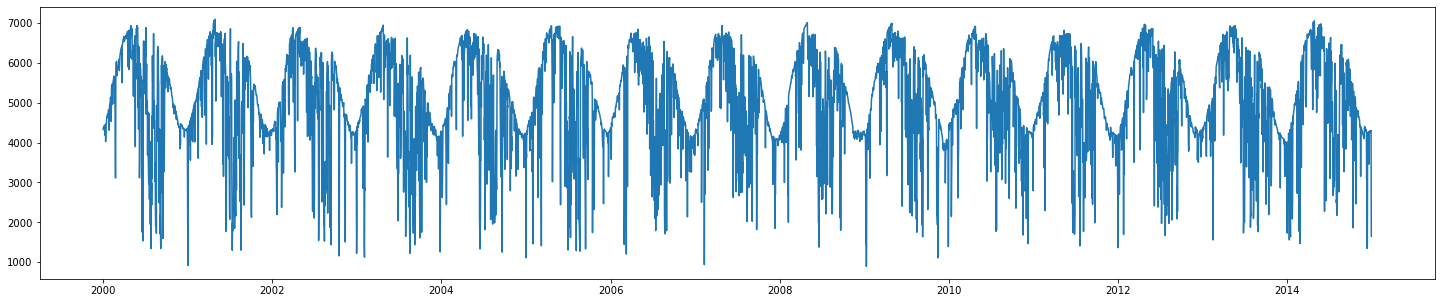

In [18]:
# Aggregate data to daily values to remove hourly variations
data = [MP['date_time'],MP['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
MP_D = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
MP_M = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
MP_D.set_index('date_time')
#MP_M.set_index('date_time')
plt.rcParams["figure.figsize"] = (25,5)

MP_D['GHI'][903] = (MP_D['GHI'][902]+MP_D['GHI'][904])/2
plt.plot(MP_D['date_time'],MP_D['GHI'])
#plt.plot(MP_D['date_time'],MP_D['GHI'])
plt.savefig('MPDAILYSEAS.png')


In [19]:
data = [A_P['date_time'],A_P['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
AP_D = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
#AP_M = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
AP_D.set_index('date_time')
AP_D['GHI'].describe()

count    5475.000000
mean     5610.302100
std      1010.038087
min      1088.000000
25%      5133.000000
50%      5754.000000
75%      6410.000000
max      7221.000000
Name: GHI, dtype: float64

In [20]:
data = [Rajasthan1['date_time'],Rajasthan1['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
RAJ_D = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
RAJ_M = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
RAJ_D.set_index('date_time')

GHI
date_time       
2000-01-01  4162
2000-01-02  4141
2000-01-03  4191
2000-01-04  4173
2000-01-05  4139
...          ...
2014-12-27  3905
2014-12-28  3954
2014-12-29  3921
2014-12-30  4030
2014-12-31  3954

[5475 rows x 1 columns]

In [21]:
data = [T_N['date_time'],T_N['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
TN_D = temp_df.groupby(temp_df['date_time'].dt.date).agg({'GHI': 'sum'}).reset_index()
# print(temp_df)
TN_M = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
TN_D.set_index('date_time')

GHI
date_time       
2000-01-01  5559
2000-01-02  5793
2000-01-03  3240
2000-01-04  5678
2000-01-05  5633
...          ...
2014-12-27  4254
2014-12-28  4433
2014-12-29  5099
2014-12-30  4689
2014-12-31  3301

[5475 rows x 1 columns]

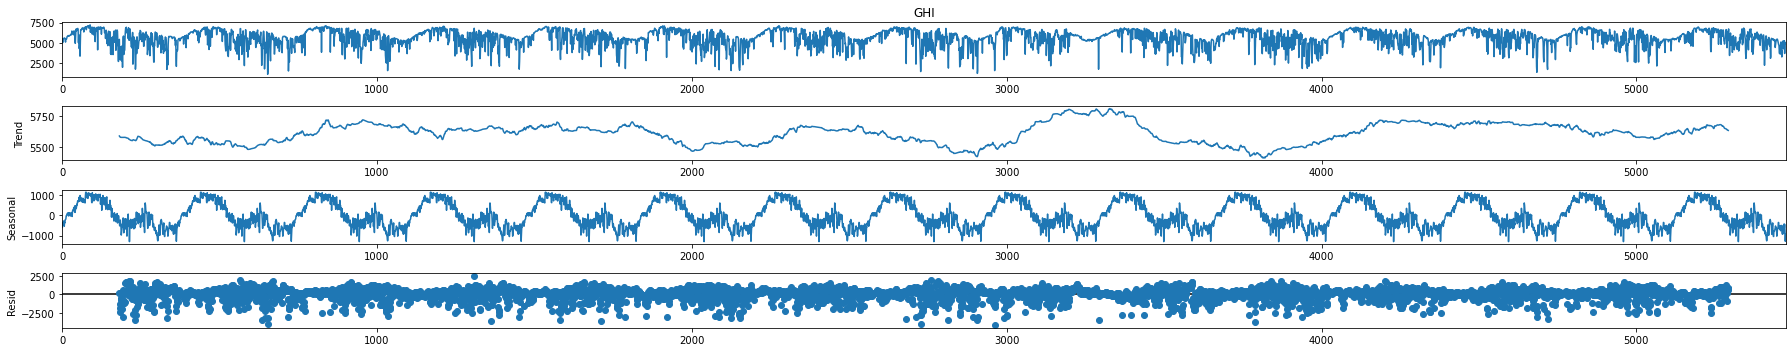

In [22]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(AP_D['GHI'],model= 'additive',period=365)
resplot=res.plot()
plt.savefig('TSMDECOMPOSITION.png')

# FORECASTING

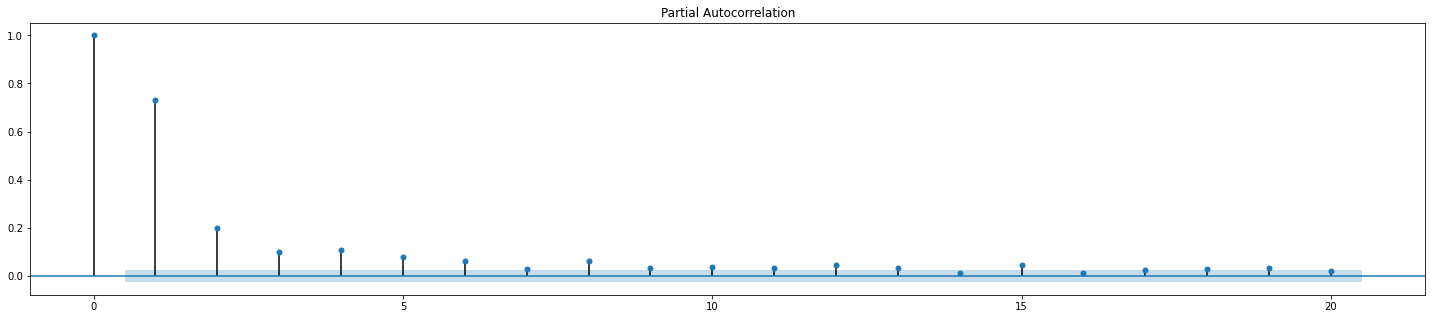

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(MP_D['GHI'],lags = 20)

plt.savefig('PACFMP.png')

In [24]:
from statsmodels.tsa.arima.model import ARIMA

## AR MODEL

In [25]:
#We will consider only p parameter ;and not q and d
ar_model = ARIMA(MP_D['GHI'],order=(14,0,0))
ar_fit_model = ar_model.fit()
print(ar_fit_model.summary())
resi_val = pd.DataFrame(ar_fit_model.resid)

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:                ARIMA(14, 0, 0)   Log Likelihood              -44365.755
Date:                Tue, 27 Apr 2021   AIC                          88763.510
Time:                        18:42:51   BIC                          88869.237
Sample:                             0   HQIC                         88800.396
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5020.7733    126.079     39.823      0.000    4773.664    5267.883
ar.L1          0.5314      0.010     50.960      0.000       0.511       0.552
ar.L2          0.1084      0.011      9.606      0.0

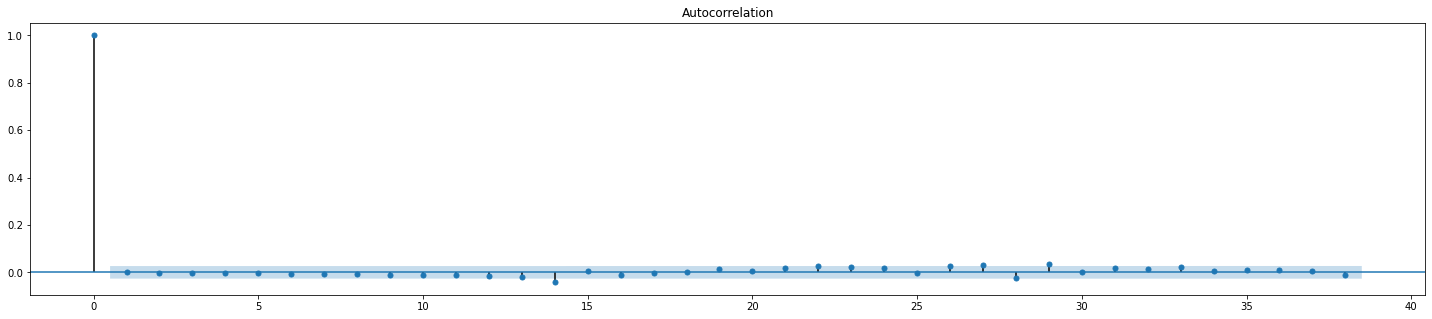

In [26]:
acf_plot = plot_acf(resi_val)

In [27]:
#Defining function to calculate MAPE value:
def MAPE(y_true,y_pred):
    percentage = []
    for i in range(len(y_pred)):
        if (y_true[i]==0):
            continue
        percentage.append((abs(y_pred[0][i])/(y_true[i]))*100)
    mapes = sum(percentage)/len(percentage)
    print("Mean Absolute Percentage Error: {0} %".format(mapes))
MAPE(MP_D['GHI'],resi_val)

Mean Absolute Percentage Error: 14.069771680911156 %


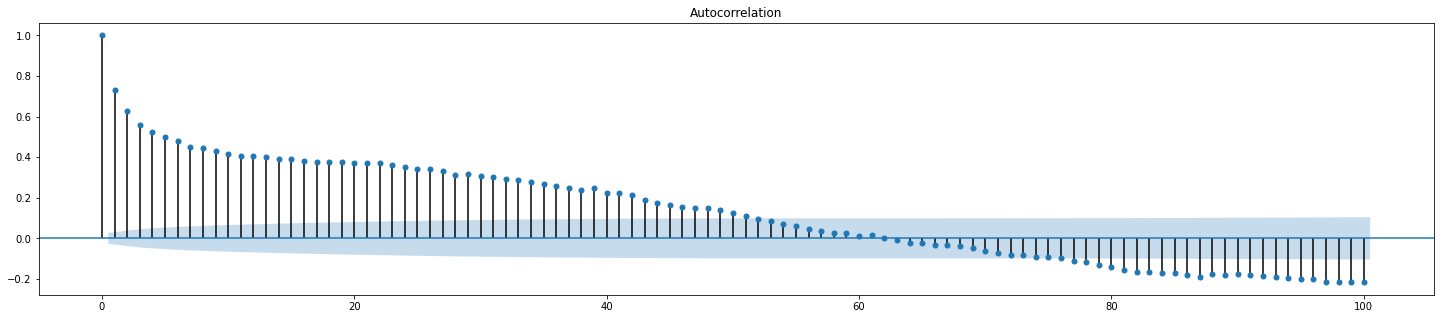

In [28]:
acf=plot_acf(MP_D['GHI'], lags=100)
plt.savefig("ACFMP.png")

## MA MODEL

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:                ARIMA(0, 0, 30)   Log Likelihood              -44384.065
Date:                Tue, 27 Apr 2021   AIC                          88832.130
Time:                        18:45:47   BIC                          89043.584
Sample:                             0   HQIC                         88905.902
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5020.6989     78.171     64.227      0.000    4867.486    5173.912
ma.L1          0.5431      0.011     51.032      0.000       0.522       0.564
ma.L2          0.4038      0.013     31.278      0.0

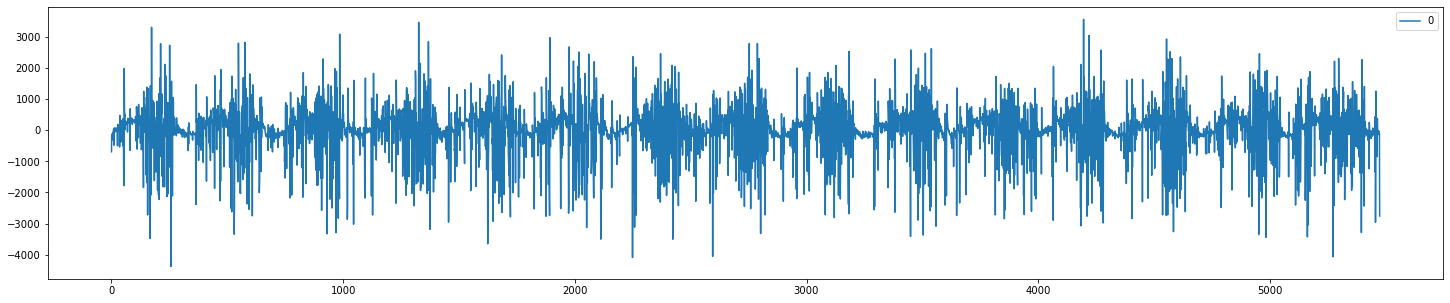

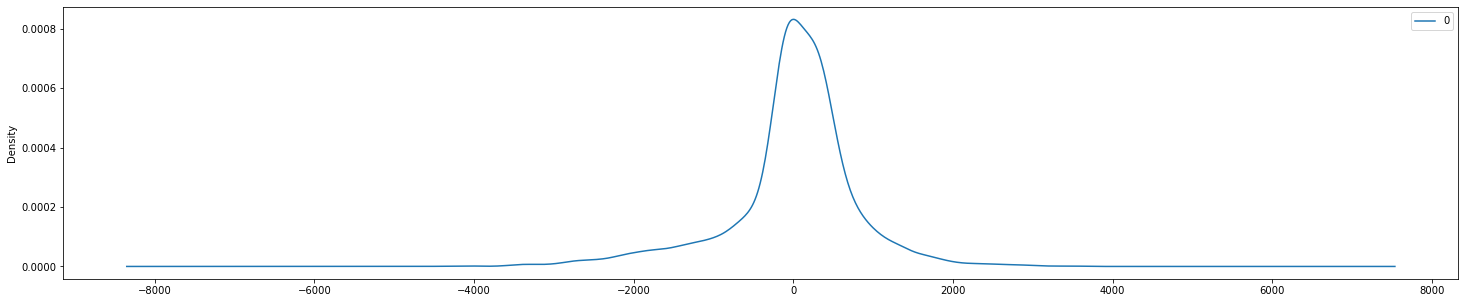

                 0
count  5475.000000
mean     -0.514214
std     802.533645
min   -4379.019481
25%    -205.508167
50%      65.902806
75%     382.163013
max    3565.466288


In [29]:
modelMA = ARIMA(MP_D['GHI'],order=(0,0,30))
fit_modelMA = modelMA.fit()
print(fit_modelMA.summary())
resi_val_MA = pd.DataFrame(fit_modelMA.resid)
resi_val_MA.plot()
plt.show()
resi_val_MA.plot(kind='kde')
plt.show()
print(resi_val_MA.describe())

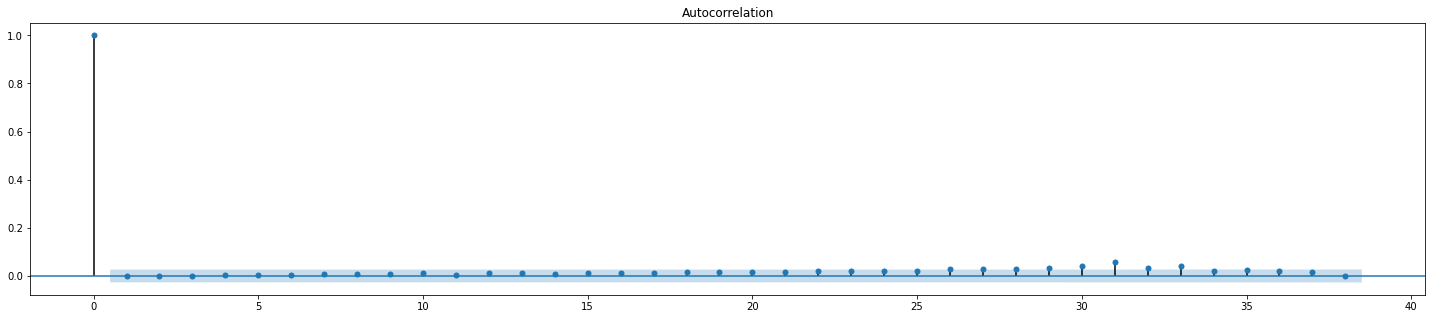

In [30]:
acf_plot = plot_acf(resi_val_MA)

In [31]:
MAPE(MP_D['GHI'],resi_val_MA)

Mean Absolute Percentage Error: 14.251344164474615 %


## ARMA MODEL 

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(14, 0, 20)   Log Likelihood              -44310.120
Date:                Tue, 27 Apr 2021   AIC                          88692.241
Time:                        18:49:05   BIC                          88930.127
Sample:                             0   HQIC                         88775.234
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5020.7733     99.007     50.711      0.000    4826.724    5214.823
ar.L1         -0.3503      2.700     -0.130      0.897      -5.642       4.942
ar.L2          0.3612      0.442      0.816      0.4

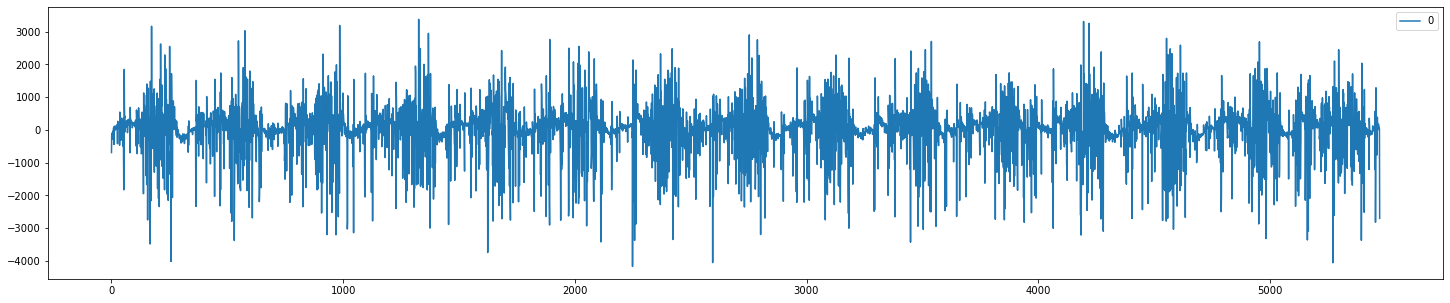

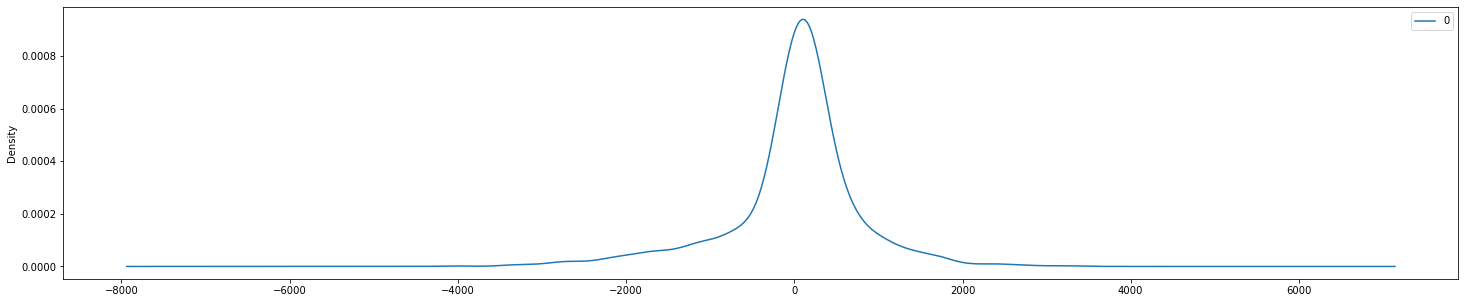

                 0
count  5475.000000
mean     -0.416098
std     791.634028
min   -4166.794476
25%    -206.109411
50%      81.265360
75%     344.834683
max    3371.355205


In [32]:
modelMA = ARIMA(MP_D['GHI'],order=(14,0,20))
fit_modelMA = modelMA.fit()
print(fit_modelMA.summary())
resi_val_ARMA = pd.DataFrame(fit_modelMA.resid)
resi_val_ARMA.plot()
plt.show()
resi_val_ARMA.plot(kind='kde')
plt.show()
print(resi_val_ARMA.describe())

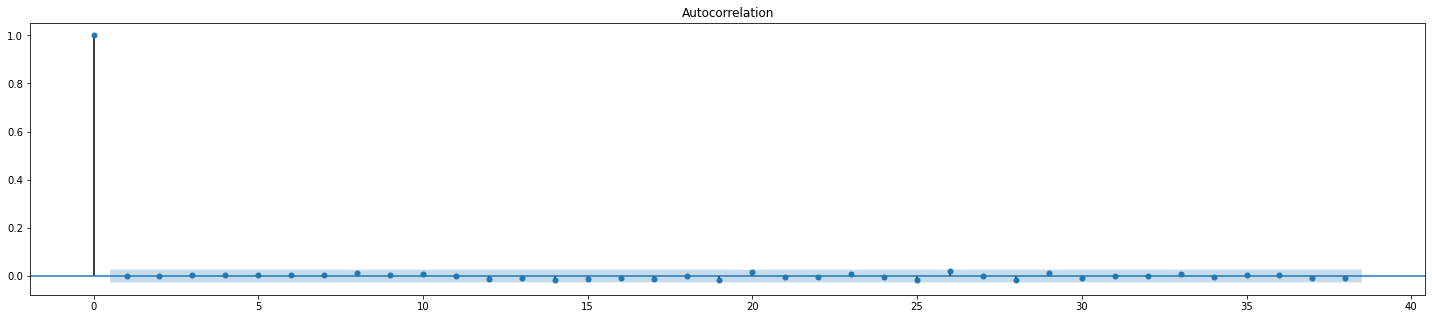

In [33]:
acf_plot = plot_acf(resi_val_ARMA)

In [34]:
MAPE(MP_D['GHI'],resi_val_ARMA)

Mean Absolute Percentage Error: 13.93353339308119 %


## ARIMA MODEL

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5475
Model:               ARIMA(12, 2, 10)   Log Likelihood              -44508.100
Date:                Tue, 27 Apr 2021   AIC                          89062.200
Time:                        22:23:10   BIC                          89214.174
Sample:                             0   HQIC                         89115.221
                               - 5475                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5317      0.094    -16.366      0.000      -1.715      -1.348
ar.L2         -1.7295      0.151    -11.462      0.000      -2.025      -1.434
ar.L3         -1.9270      0.168    -11.493      0.0

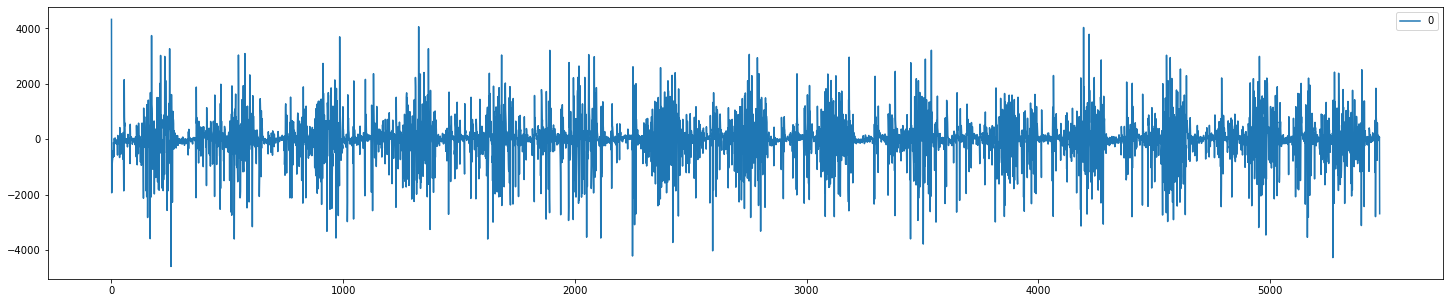

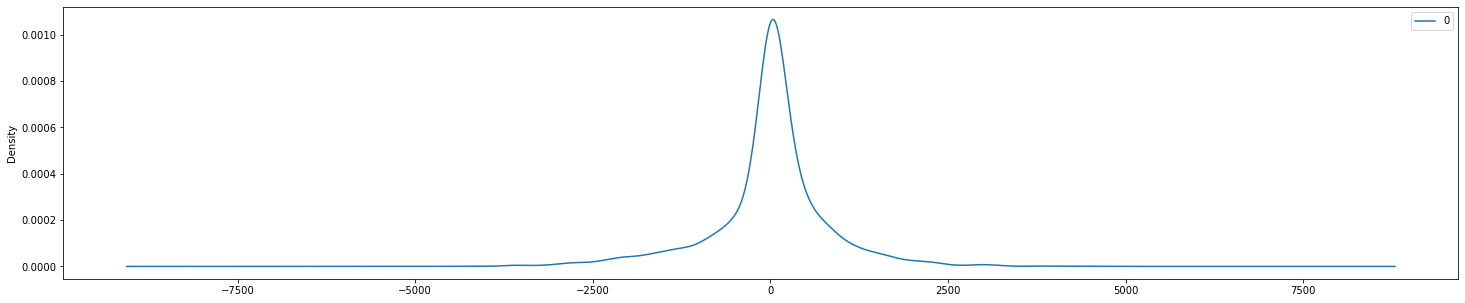

                 0
count  5475.000000
mean     -4.501266
std     825.560489
min   -4597.348784
25%    -205.366460
50%      36.409869
75%     298.167531
max    4328.000000


In [44]:
#d = 2 gave a better fit over the data(MAPE) than d = 1
#modelARIMA = ARIMA(MP_D['GHI'],order=(12,1,10))
modelARIMA = ARIMA(MP_D['GHI'],order=(12,2,10))
fit_modelARIMA = modelARIMA.fit()
print(fit_modelARIMA.summary())
resi_val_ARIMA = pd.DataFrame(fit_modelARIMA.resid)
resi_val_ARIMA.plot()
plt.show()
resi_val_ARIMA.plot(kind='kde')
plt.show()
print(resi_val_ARIMA.describe())

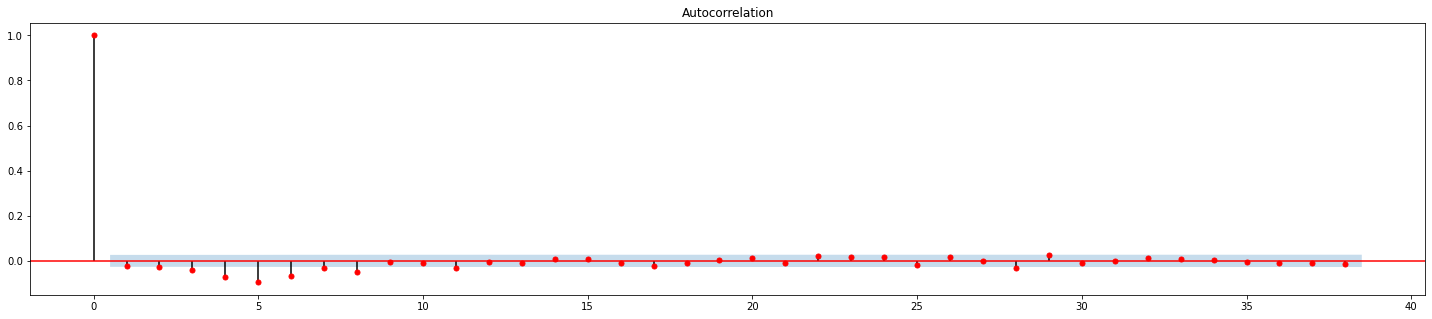

In [50]:
acf_plot = plot_acf(resi_val_ARIMA,color='red')
plt.savefig("ARIMARESI.png")

In [37]:
MAPE(MP_D['GHI'],resi_val_ARIMA)

Mean Absolute Percentage Error: 13.763340434659435 %


In [38]:
train_len = int((len(MP_D)*13)/15)
TRAIN_SET = MP_D['GHI'][0:train_len]
TEST_SET = MP_D['GHI'][train_len:len(MP_D)]

# ROLLING FORECAST 

## AR MODEL

In [39]:
archive = TRAIN_SET.copy()

predictions = []
weekly = []

for t in range(len(TEST_SET)):
  modelAR = ARIMA(archive,order = (8,0,0))
  model_fit = modelAR.fit()

  if (t)%7==0:
    forecast = model_fit.predict(start=t+train_len, end=t+train_len+6)
    #print(forecast)
    for i in range(7):
      weekly.append(forecast[train_len+t+i])

  output = model_fit.forecast()
  predVal = output[train_len+t]
  predictions.append(predVal)
  archive[len(archive)] = TEST_SET[train_len+t]


Mean Absolute Percentage Error: 14.966543424655843 %


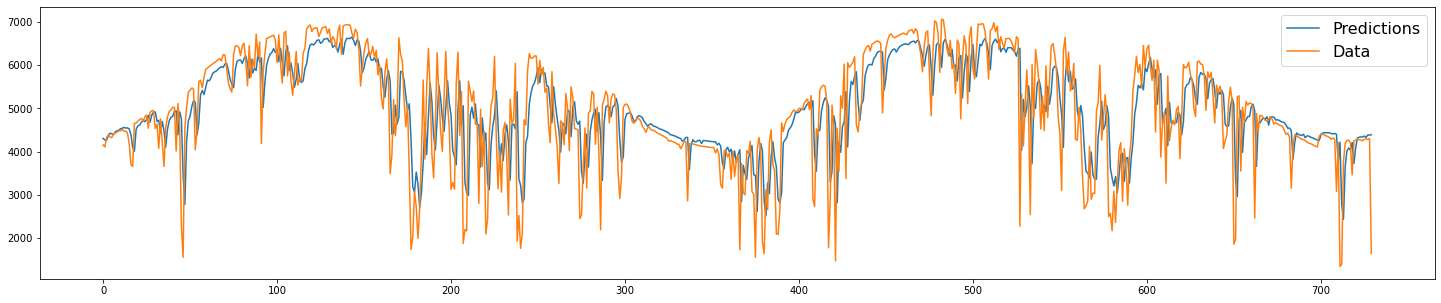

In [40]:
percentage = []
for i in range(len(predictions)):
  percentage.append((abs(predictions[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,predictions)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARDAILY.png")

Mean Absolute Percentage Error: 18.74360903980428 %


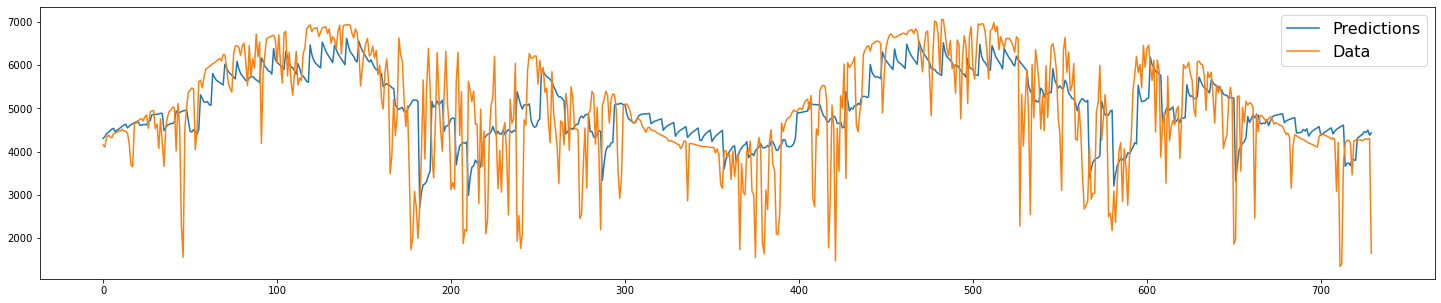

In [41]:
percentage = []
for i in range(len(TEST_SET)):
  percentage.append((abs(weekly[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,weekly[:len(TEST_SET)])
#print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weekly[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARWEEK.png")

# MA MODEL 

In [43]:
archive = MP_D['GHI']

predictionsMA = []
weeklyMA = []
for t in range(len(TEST_SET)):
  modelMA = ARIMA(archive[:train_len+t],order = (0,0,7))
  model_fitMA = modelMA.fit()

  if (t)%7==0:
    forecast = model_fitMA.predict(start=t+train_len, end=t+train_len+6)
    # print(forecast)
    for i in range(7):
      weeklyMA.append(forecast[train_len+t+i])
 
 
  output = model_fitMA.forecast()
  predVal = output[train_len+t]
  predictionsMA.append(predVal)
  

KeyboardInterrupt: 

In [ ]:
percentage = []
for i in range(len(predictionsMA)):
  percentage.append((abs(predictionsMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,predictionsMA)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("MADAILY.png")

In [ ]:
percentage = []
for i in range(len(TEST_SET)):
  percentage.append((abs(weeklyMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,weeklyMA[:len(TEST_SET)])
#print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("MAWEEK.png")

# ARMA MODEL

In [ ]:
 #Rolling forecast for ARMA
archive = MP_D['GHI']

predictionsARMA = []
weeklyARMA = []
monthlyARMA = []
for t in range(len(TEST_SET)):
  modelARMA = ARIMA(archive[:train_len+t],order = (4,0,1))
  model_fitARMA = modelARMA.fit()

  if (t)%7==0:
    forecast = model_fitARMA.predict(start=t+train_len, end=t+train_len+6)
    # print(forecast)
    for i in range(7):
      weeklyARMA.append(forecast[train_len+t+i])
  
  #if (t)%30==0:
   # forecast = model_fitARMA.predict(start=t+train_len, end=t+train_len+29)
    # print(forecast)
    #for i in range(30):
     # monthlyARMA.append(forecast[train_len+t+i])

  output = model_fitARMA.forecast()
  predVal = output[train_len+t]
  predictionsARMA.append(predVal)
  # archive[len(archive)] = TEST_SET[TRAIN_SET_len+t]

In [ ]:
percentage = []
for i in range(len(predictionsARMA)):
  percentage.append((abs(predictionsARMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,predictionsARMA)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsARMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARMADAILY.png")

In [ ]:
percentage = []
for i in range(len(TEST_SET)):
  percentage.append((abs(weeklyARMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,weeklyARMA[:len(TEST_SET)])
#print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyARMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARMAWEEK.png")

## ARIMA MODEL

In [ ]:
# Rolling forecast for ARIMA
archive = MP_D['GHI']

predictionsARIMA = []
weeklyARIMA = []
monthlyARIMA = []
for t in range(len(TEST_SET)):
  modelARIMA = ARIMA(archive[:train_len+t],order = (4,1,5))
  model_fitARIMA = modelARIMA.fit()

  if (t)%7==0:
    forecast = model_fitARIMA.predict(start=t+train_len, end=t+train_len+6)
    #print(forecast)
    for i in range(7):
      weeklyARIMA.append(forecast[train_len+t+i])
  
  #if (t)%30==0:
   # forecast = model_fitARIMA.predict(start=t+train_len, end=t+train_len+29)
    # print(forecast)
    #for i in range(30):
     # monthlyARIMA.append(forecast[train_len+t+i])

  output = model_fitARIMA.forecast()
  predVal = output[train_len+t]
  predictionsARIMA.append(predVal)
  # archive[len(archive)] = TEST_SET[TRAIN_SET_len+t]

In [ ]:
percentage = []
for i in range(len(predictionsARIMA)):
  percentage.append((abs(predictionsARIMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,predictionsARIMA)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictionsARIMA)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARIMADAILY.png")

In [ ]:
percentage = []
for i in range(len(TEST_SET)):
  percentage.append((abs(weeklyARIMA[i]-TEST_SET[train_len+i])/(TEST_SET[train_len+i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET]

#mse = mean_squared_error(test_points,weeklyARIMA[:len(TEST_SET)])
#print("Mean Sqaured Error: {0}".format(mse))

# Predictions of first two weeks after training dataset.
# plt.plot(weekly[14:28])
# plt.plot(test_points[14:28])

plt.plot(weeklyARIMA[:len(test_points)])
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig("ARIMAWEEK.png")

# MONTHLY ANALYSIS 

In [188]:
data = [MP['date_time'],MP['GHI']]
headers = ["date_time","GHI"]
temp_df = pd.concat(data,axis=1,keys=headers)
temp_df.set_index('date_time',inplace=True)
g = temp_df.groupby(pd.Grouper(freq="M"))
MP_S=g.sum()
MP_S.reset_index
MP_S.head()

GHI
date_time         
2000-01-31  141159
2000-02-29  146536
2000-03-31  191797
2000-04-30  197549
2000-05-31  194751

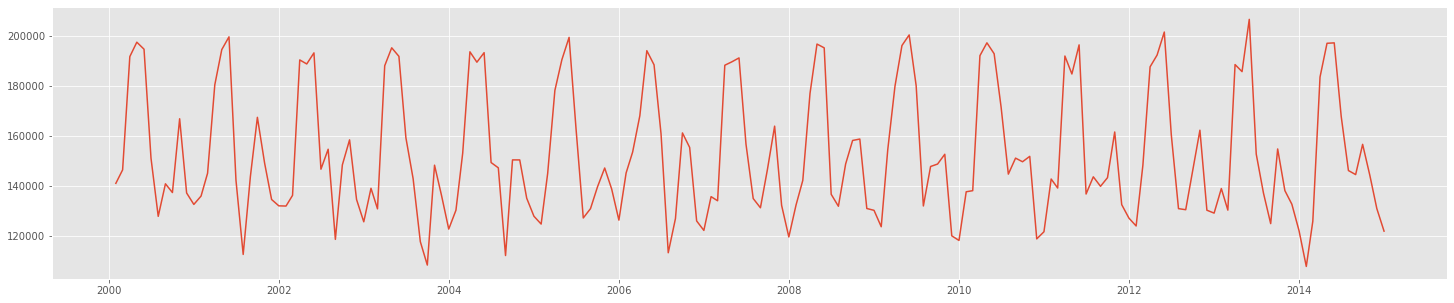

In [189]:
plt.plot(MP_S)

In [194]:
train_len_n = int((len(MP_S)*13)/15)
TRAIN_SET_N = MP_S['GHI'][0:train_len_n]
TEST_SET_N = MP_S['GHI'][train_len_n:len(MP_S)]
TRAIN_SET_N.shape

(156,)

# SARIMA MODEL

In [195]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelSARIMA = SARIMAX(MP_S['GHI'], order = (3,0,3),seasonal_order=(2,0,1,12))
fit_modelSARIMA = modelSARIMA.fit()
print(fit_modelSARIMA.summary())
resi_val_SARIMA = pd.DataFrame(fit_modelSARIMA.resid)

                                      SARIMAX Results                                       
Dep. Variable:                                  GHI   No. Observations:                  180
Model:             SARIMAX(3, 0, 3)x(2, 0, [1], 12)   Log Likelihood               -1995.343
Date:                              Sun, 25 Apr 2021   AIC                           4010.687
Time:                                      13:42:44   BIC                           4042.616
Sample:                                  01-31-2000   HQIC                          4023.633
                                       - 12-31-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5845      1.232      0.474      0.635      -1.830       2.999
ar.L2          0.37

In [54]:
#acf_plot = plot_acf(resi_val_SARIMA)


In [197]:
MP_S['GHI'].head()

date_time
2000-01-31    141159
2000-02-29    146536
2000-03-31    191797
2000-04-30    197549
2000-05-31    194751
Freq: M, Name: GHI, dtype: int64

In [233]:
archive = MP_S['GHI']

prediction = []
for t in range(len(TEST_SET_N)):
  modelSARIMA = SARIMAX(archive[0:train_len_n+t], order = (3,0,3),seasonal_order=(2,0,1,12),enforce_stationarity=False,enforce_invertibility=True)
  model_fit = modelSARIMA.fit()
  output = model_fit.forecast()
  predVal = output[0]
  prediction.append(predVal)


/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed 

In [234]:
#print(len(prediction))

24


Mean Absolute Percentage Error: 5.946804393355113 %


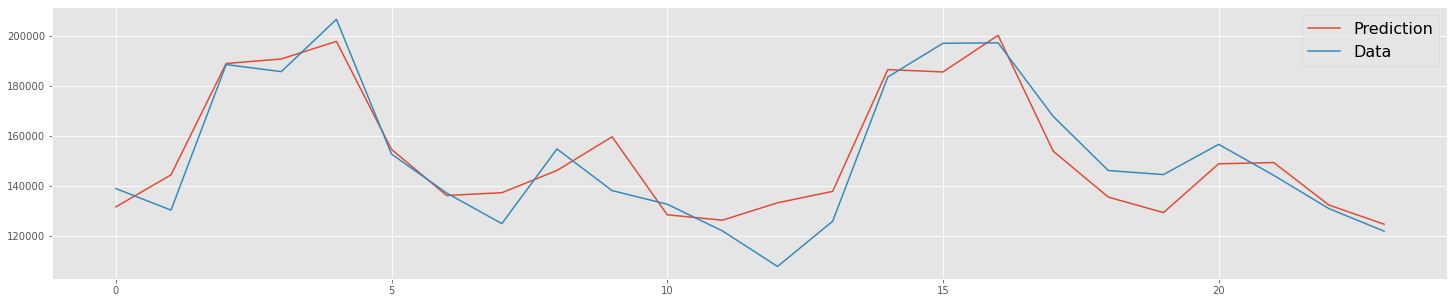

In [236]:
percentage = []
for i in range(len(prediction)):
  percentage.append((abs(prediction[i]-TEST_SET_N[+i])/(TEST_SET_N[i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET_N]

#mse = mean_squared_error(test_points,predictions)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(prediction)
plt.plot(test_points)

plt.legend(('Prediction','Data'),fontsize=16)
plt.savefig('SARIMASEA.png')

## ARIMA FOR SEASONAL ANALYSIS

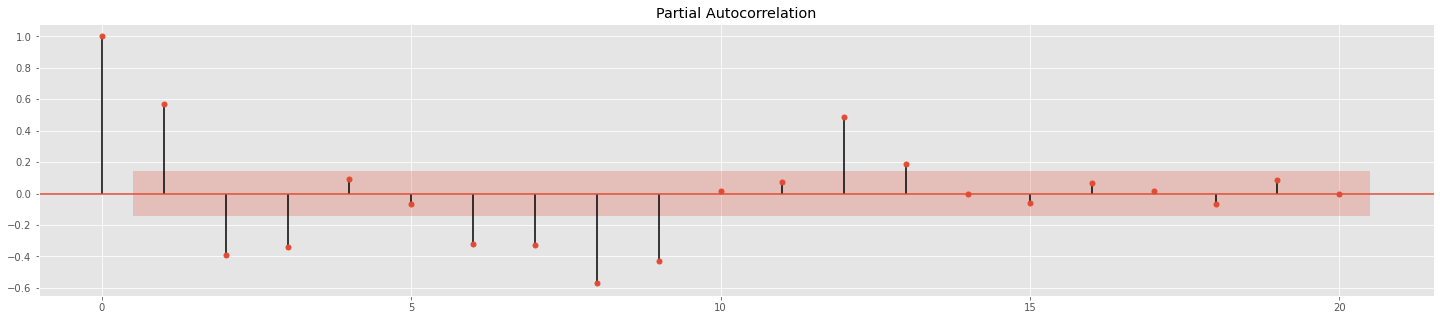

In [207]:
pacf = plot_pacf(MP_S['GHI'],lags = 20)


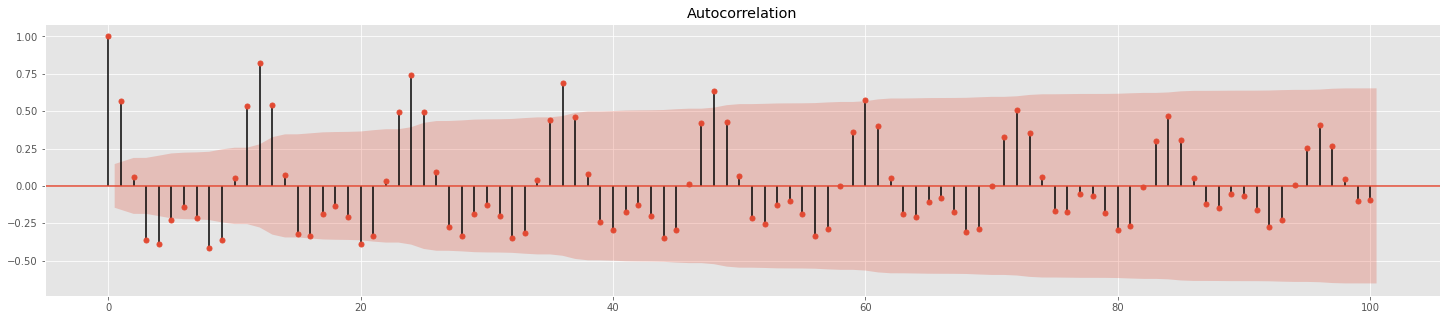

In [208]:
acf = plot_acf(MP_S['GHI'],lags = 100)


In [237]:
#d = 2 gave a better fit over the data(MAPE) than d = 1
#modelARIMA = ARIMA(MP_D['GHI'],order=(12,1,10))
modelARIMASEA = ARIMA(MP_S['GHI'],order=(5,1,3))
fit_modelARIMASEA = modelARIMASEA.fit()
print(fit_modelARIMASEA.summary())
resi_val_ARIMAS = pd.DataFrame(fit_modelARIMASEA.resid)


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                  180
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -2015.304
Date:                Sun, 25 Apr 2021   AIC                           4048.608
Time:                        14:17:11   BIC                           4077.294
Sample:                    01-31-2000   HQIC                          4060.240
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9100      0.109     -8.334      0.000      -1.124      -0.696
ar.L2          0.1290      0.119      1.081      0.280      -0.105       0.363
ar.L3          0.1374      0.112      1.228      0.2

In [238]:
MAPE(MP_S['GHI'],resi_val_ARIMAS)

Mean Absolute Percentage Error: 10.667453384020005 %


In [239]:
archive = MP_S['GHI']
predictions=[]

for t in range(len(TEST_SET_N)):
  modelARIMASEA = ARIMA(archive[0:train_len_n+t],order = (5,1,3))
  model_fitARIMASEA = modelARIMASEA.fit()
  output = model_fitARIMASEA.forecast()
  print(output[0])
  predVal = output[0]
  predictions.append(predVal)

133438.20454343047
154442.30203172445
142664.99609960828
176319.0113272546
190051.2694586324
162905.0474336819
144367.5379900994
123275.70240852646
133175.40959153307
174459.7888303631
149608.36744725835


/home/lego/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



149957.48433230878
145442.33115656013
127882.57294737682
153149.48685216173
182184.52419191494
196930.35489751757
159332.75522891214
149063.37439264468
134084.4995460923
137497.57147721623
168891.95661250054
136831.47883503002
142908.87554915328


Mean Absolute Percentage Error: 11.433164172269175 %


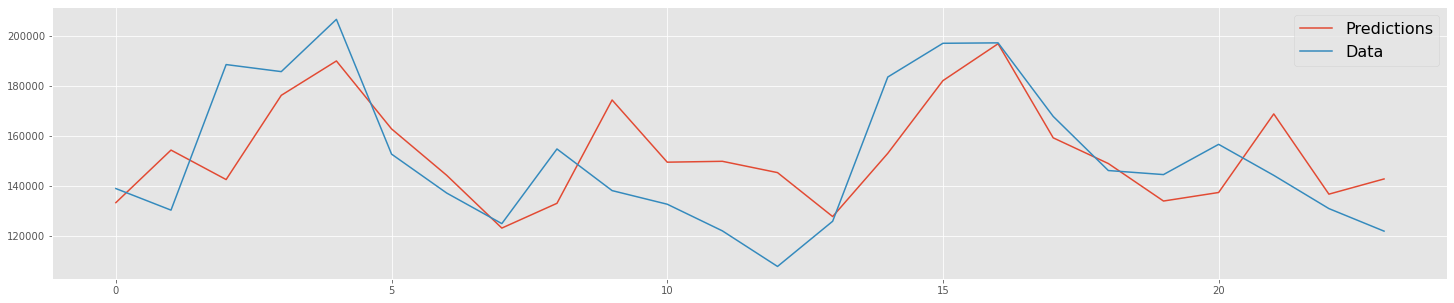

In [241]:
percentage = []
for p in range(len(predictions)):
  percentage.append((abs(predictions[p]-TEST_SET_N[+p])/(TEST_SET_N[p]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

test_points = [x for x in TEST_SET_N]

#mse = mean_squared_error(test_points,predictions)
#print("Mean Sqaured Error: {0}".format(mse))

plt.plot(predictions)
plt.plot(test_points)

plt.legend(('Predictions','Data'),fontsize=16)
plt.savefig('ARIMASEA.png')